In [1]:
import warnings
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings("ignore")

----

#### EXTRACCIÓN

In [3]:
df = pd.read_csv('shows_data.csv')

#### TRANSFORMACIÓN

In [4]:
# Se convierte la columna de fecha a un formato que MySQL entienda (YYYY-MM-DD)
df['DateAdded'] = pd.to_datetime(df['DateAdded']).dt.date

#### CARGA A MYSQL

In [5]:
# Se crea la conexión al servidor local
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='root',
    database='streaming_oltp'
)
cursor = conn.cursor()

# Se crea la tabla si no existe
cursor.execute("""
CREATE TABLE IF NOT EXISTS shows (
    ShowID VARCHAR(10) PRIMARY KEY NOT NULL,
    Type VARCHAR(50),
    Title VARCHAR(255),
    Director VARCHAR(255),
    Cast TEXT,
    Country VARCHAR(100),
    DateAdded DATE,
    ReleaseYear INT,
    Rating VARCHAR(10),
    Duration VARCHAR(20),
    ListedIn VARCHAR(100),  
    Description TEXT
)
""")

# Se borra información previa
cursor.execute("""DELETE FROM shows""")

# Se insertan los datos fila por fila
for index, row in df.iterrows():
    SQL = """INSERT INTO shows (ShowID, Type, Title, Director, Cast, Country, 
             DateAdded, ReleaseYear, Rating, Duration, ListedIn, Description)
             VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"""
    cursor.execute(SQL, tuple(row))

# Se hace commit para asegurar lo cambios
conn.commit()

# Se cierra la conexión
cursor.close()
conn.close()

----

#### ANÁLISIS DE DATOS

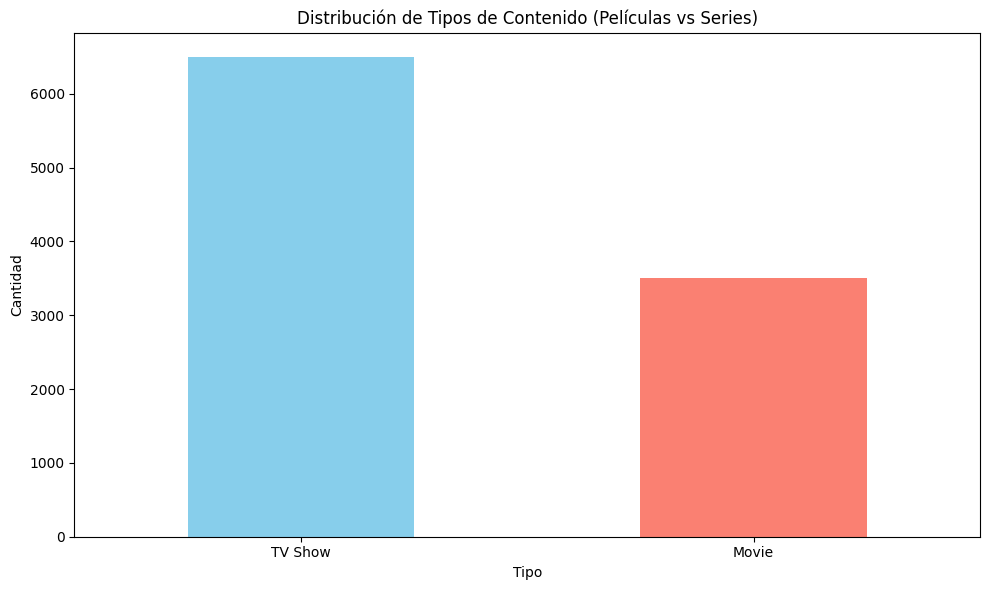

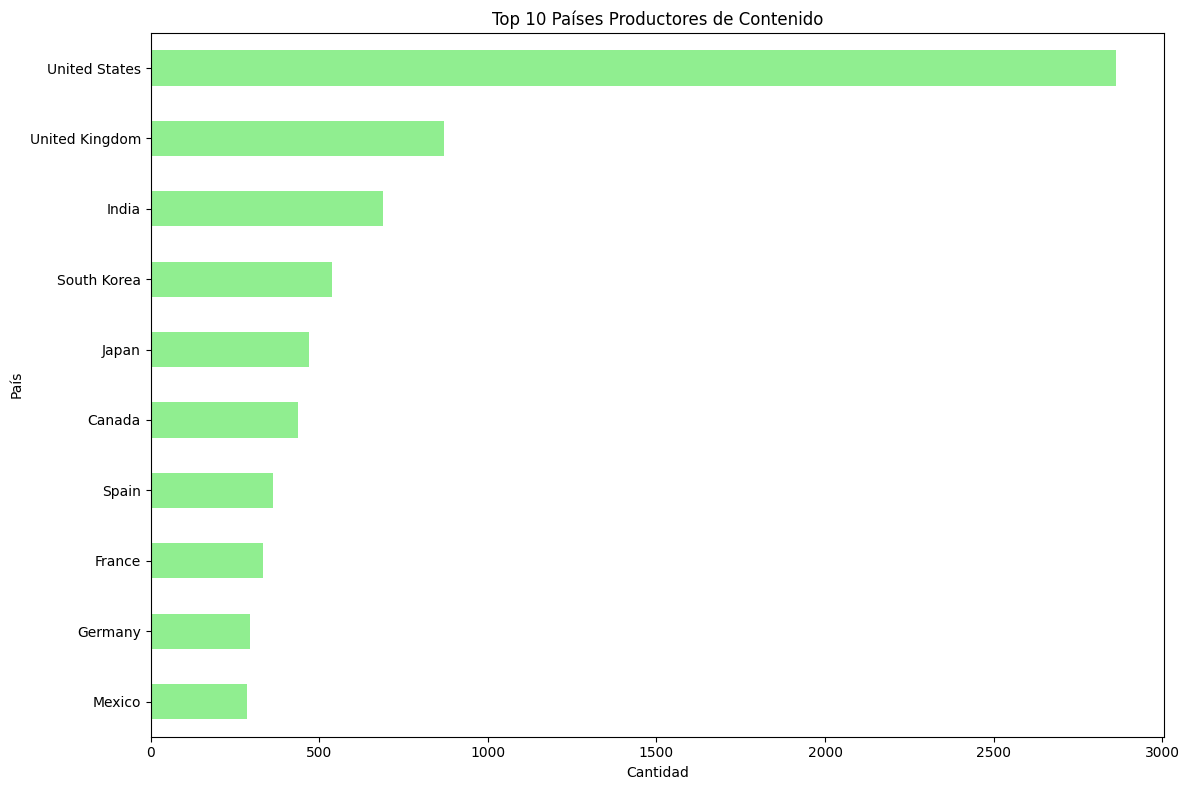

In [6]:
# Se crea la conexión al servidor local
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='root',
    database='streaming_oltp'
)

# Se leen los datos directamente desde MySQL para el análisis
QUERY = "SELECT * FROM shows"
df_mysql = pd.read_sql(QUERY, conn)

# Visualización 1: Distribución de Tipos de Contenido
type_counts = df_mysql['Type'].value_counts()
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Tipos de Contenido (Películas vs Series)')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Visualización 2: Top 10 Países con más Contenido
country_counts = df_mysql['Country'].value_counts().head(10)
plt.figure(figsize=(12, 8))
country_counts.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Países Productores de Contenido')
plt.xlabel('Cantidad')
plt.ylabel('País')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Se cierra la conexión
conn.close()